# NCAR Innovator Program Project
### Notebook by: Maria J. Molina (NCAR/University of Maryland) and Jessica Moulite (Howard University)

Here we compare the NOAA Everglades weather station temperature data with 2-m temperature data from ERA5. The objective of the comparison is to assess how representative state-of-the-art reanalysis is of local weather and trends, given its heavy use in climate assessment studies.

Importing packages

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Functions

In [2]:
def cel_to_far(tmp):
    """
    Convert celsius to farenheit
    """
    newtmp = []
    for i in tmp:
        if i == 99.9:
            newtmp.append(np.nan)
        if i != 99.9:
            newtmp.append((i * (9/5)) + 32)
    return np.array(newtmp)


def cel_to_nan(tmp):
    """
    Change 9999 to np.nan
    """
    newtmp = []
    for i in tmp:
        if i == 99.9:
            newtmp.append(np.nan)
        if i != 99.9:
            newtmp.append(i)
    return np.array(newtmp)


def convert_to_datetime(time_value):
    """
    Convert to a datetime object to be able to compute time difference.
    """
    return datetime.datetime(
        pd.to_datetime(time_value).year,
        pd.to_datetime(time_value).month,
        pd.to_datetime(time_value).day,
        pd.to_datetime(time_value).hour,
        pd.to_datetime(time_value).minute,
        pd.to_datetime(time_value).second,
    )


def compute_time_difference(a, b):
    """
    Compute time difference between two times.
    """
    if a >= b:
        return convert_to_datetime(a) - convert_to_datetime(b)
    if b > a:
        return convert_to_datetime(b) - convert_to_datetime(a)


def extract_era5_time(t_daily, t_full):
    """
    Extract the era5 temperature corresponding time.
    """
    era5_time_array = []

    for i, j in zip(t_daily.time, t_daily):

        tmp = t_full.sel(
            time=slice(i, pd.to_datetime(i.values) + datetime.timedelta(hours=23)))

        era5_time_array.append(tmp.where(tmp == j, drop=True).time.values)

    return era5_time_array

## Open ERA5 data (2008-present)

In [3]:
# open files
ds_ = xr.open_mfdataset(
    '/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.sfc/*/e5.oper.an.sfc.128_167_2t.ll025sc.*.nc')['VAR_2T']

In [4]:
ds_

<xarray.DataArray 'VAR_2T' (time: 501120, latitude: 721, longitude: 1440)>
dask.array<concatenate, shape=(501120, 721, 1440), dtype=float32, chunksize=(744, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1965-04-01 ... 2022-05-31T23:00:00
Attributes: (12/14)
    long_name:                                          2 metre temperature
    short_name:                                         2t
    units:                                              K
    original_format:                                    WMO GRIB 1 with ECMWF...
    ecmwf_local_table:                                  128
    ecmwf_parameter:                                    167
    ...                                                 ...
    grid_specification:                                 0.25 degree x 0.25 de...
    rda_dataset:                                        ds633.0
    rda_dataset_url:                                    https:/rda.ucar.edu/d...
    rda_dataset_doi:                                    DOI: 10.5065/BH6N-5N20
    rda_dataset_group:                                  ERA5 atmospheric surf...
    QuantizeGranularBitGroomNumberOfSignificantDigits:  7

## Open NOAA station data

In [5]:
EVER_temp = pd.read_csv('/glade/scratch/molina/3043202.csv', low_memory=False)

In [6]:
EVER_temp

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,KE1,KF1,OB1,QUALITY_CONTROL.1,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2007-02-10T20:05:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+9999,9","999999,9,9,9","999,9,9,9999,9"
1,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2007-02-10T20:10:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+9999,9","999999,9,9,9","999,9,9,9999,9"
2,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2007-02-10T20:15:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+9999,9","999999,9,9,9","999,9,9,9999,9"
3,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2007-02-10T20:20:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+9999,9","999999,9,9,9","999,9,9,9999,9"
4,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2007-02-10T20:25:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+9999,9","999999,9,9,9","999,9,9,9999,9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527655,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2022-08-02T03:40:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+0286,1","999999,9,9,9","999,9,9,9999,9"
1527656,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2022-08-02T03:45:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+0286,1","999999,9,9,9","999,9,9,9999,9"
1527657,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2022-08-02T03:50:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+0285,1","999999,9,9,9","999,9,9,9999,9"
1527658,99999992826,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183,1.2,2022-08-02T03:55:00,I,CRN05,99999,V020,...,NaN,NaN,NaN,V020,CRN05,"99999,9",I,"+0284,1","999999,9,9,9","999,9,9,9999,9"


In [7]:
# subset the data using dates of interest (what is available in ERA5)
EVER_temp = EVER_temp[(
    EVER_temp['DATE'] >= str(
        pd.to_datetime(ds_.coords['time'].isel(time=0).values))) & (
    EVER_temp['DATE'] <= str(
        pd.to_datetime(ds_.coords['time'].isel(time=-1).values)))]

In [8]:
time_date = []
temperature_C = []

for j, i in zip(EVER_temp['DATE'].values, EVER_temp['TMP'].values.astype(str)):

    time_date.append(j)

    # convert the string format to decimal format (originally in METAR code)
    temperature_C.append(
        float(i[0]+i.split(',')[0][2:-1]+'.'+i.split(',')[0][-1]))

time_date = np.array(time_date)
temperature_C = np.array(temperature_C)

temperature_F = cel_to_far(temperature_C)
temperature_C = cel_to_nan(temperature_C)

In [9]:
# making into dataframe for easier manipulation

# initialize data of lists.
data = {'Datetime': pd.to_datetime(time_date),
        'Temperature_C': temperature_C,
        'Temperature_F': temperature_F,
        'Latitude': EVER_temp['LATITUDE'],
        'Longitude': EVER_temp['LONGITUDE'],
       }

# Create DataFrame and quality control
df = pd.DataFrame(data)
df = df.dropna()  # drop any nan values
df = df.drop_duplicates(keep='first')
# drop any duplicate rows
df = df[~df['Datetime'].duplicated()].drop_duplicates()

## Select temperatures from ERA5 using NOAA metadata (lat, lon, and hour)

In [ ]:
ERA5_temperatures_C = []
ERA5_date = []

for lat, lon, date in zip(df['Latitude'], df['Longitude'] % 360, df['Datetime']):

    tmp = ds_.sel(longitude=lon, latitude=lat, time=date, method='nearest')

    ERA5_temperatures_C.append((tmp - 273.15).values)

    ERA5_date.append(tmp.coords['time'].values)

In [ ]:
ERA5_temperatures_C = np.array(ERA5_temperatures_C)

In [ ]:
ERA5_temperatures_F = cel_to_far(ERA5_temperatures_C)

In [ ]:
# initialize data of lists.
data = {'Datetime': pd.to_datetime(ERA5_date),
        'Temperature_C': ERA5_temperatures_C,
        'Temperature_F': ERA5_temperatures_F,
       }

df_era5 = pd.DataFrame(data)

In [ ]:
# drop duplicate rows
df = df[~df_era5['Datetime'].duplicated().values]
df_era5 = df_era5[~df_era5['Datetime'].duplicated()].drop_duplicates()

### clean up dates prior to computation of metrics

In [15]:
df

,Datetime,Temperature_C,Temperature_F,Latitude,Longitude
24,2007-02-10 22:05:00,24.0,75.20,25.8996,-81.3183
29,2007-02-10 22:30:00,22.7,72.86,25.8996,-81.3183
41,2007-02-10 23:30:00,18.9,66.02,25.8996,-81.3183
53,2007-02-11 00:30:00,16.8,62.24,25.8996,-81.3183
65,2007-02-11 01:30:00,15.4,59.72,25.8996,-81.3183
...,...,...,...,...,...
1509371,2022-05-30 19:30:00,25.4,77.72,25.8996,-81.3183
1509383,2022-05-30 20:30:00,25.7,78.26,25.8996,-81.3183
1509395,2022-05-30 21:30:00,24.5,76.10,25.8996,-81.3183
1509407,2022-05-30 22:30:00,23.9,75.02,25.8996,-81.3183


In [17]:
df['Datetime'].iloc[3]

Timestamp('2007-02-11 00:30:00')

In [18]:
# clean up dates to ensure start and end have 24 hours
df = df[df['Datetime'] >= df['Datetime'].iloc[3]]

In [19]:
df

,Datetime,Temperature_C,Temperature_F,Latitude,Longitude
53,2007-02-11 00:30:00,16.8,62.24,25.8996,-81.3183
65,2007-02-11 01:30:00,15.4,59.72,25.8996,-81.3183
77,2007-02-11 02:30:00,14.2,57.56,25.8996,-81.3183
89,2007-02-11 03:30:00,13.3,55.94,25.8996,-81.3183
101,2007-02-11 04:30:00,12.6,54.68,25.8996,-81.3183
...,...,...,...,...,...
1509371,2022-05-30 19:30:00,25.4,77.72,25.8996,-81.3183
1509383,2022-05-30 20:30:00,25.7,78.26,25.8996,-81.3183
1509395,2022-05-30 21:30:00,24.5,76.10,25.8996,-81.3183
1509407,2022-05-30 22:30:00,23.9,75.02,25.8996,-81.3183


In [20]:
df_era5

,Datetime,Temperature_C,Temperature_F
0,2007-02-10 22:00:00,25.083826,77.150887
5,2007-02-10 23:00:00,24.604944,76.288900
17,2007-02-11 00:00:00,23.091272,73.564290
29,2007-02-11 01:00:00,22.130060,71.834108
41,2007-02-11 02:00:00,20.136683,68.246029
...,...,...,...
1501661,2022-05-30 20:00:00,28.701441,83.662593
1501673,2022-05-30 21:00:00,27.247614,81.045705
1501685,2022-05-30 22:00:00,26.714808,80.086654
1501697,2022-05-30 23:00:00,26.293329,79.327993


In [21]:
df_era5['Datetime'].iloc[2]

Timestamp('2007-02-11 00:00:00')

In [22]:
df_era5 = df_era5[(df_era5['Datetime'] >= df_era5['Datetime'].iloc[2]) & (
                   df_era5['Datetime'] <= df['Datetime'].iloc[-1])]

In [23]:
# confirm start and end dates are the same
assert df['Datetime'].iloc[0].date() == df_era5['Datetime'].iloc[0].date()
assert df['Datetime'].iloc[-1].date() == df_era5['Datetime'].iloc[-1].date()

In [24]:
df

,Datetime,Temperature_C,Temperature_F,Latitude,Longitude
53,2007-02-11 00:30:00,16.8,62.24,25.8996,-81.3183
65,2007-02-11 01:30:00,15.4,59.72,25.8996,-81.3183
77,2007-02-11 02:30:00,14.2,57.56,25.8996,-81.3183
89,2007-02-11 03:30:00,13.3,55.94,25.8996,-81.3183
101,2007-02-11 04:30:00,12.6,54.68,25.8996,-81.3183
...,...,...,...,...,...
1509371,2022-05-30 19:30:00,25.4,77.72,25.8996,-81.3183
1509383,2022-05-30 20:30:00,25.7,78.26,25.8996,-81.3183
1509395,2022-05-30 21:30:00,24.5,76.10,25.8996,-81.3183
1509407,2022-05-30 22:30:00,23.9,75.02,25.8996,-81.3183


In [25]:
df_era5

,Datetime,Temperature_C,Temperature_F
17,2007-02-11 00:00:00,23.091272,73.564290
29,2007-02-11 01:00:00,22.130060,71.834108
41,2007-02-11 02:00:00,20.136683,68.246029
53,2007-02-11 03:00:00,18.849024,65.928243
65,2007-02-11 04:00:00,18.652826,65.575087
...,...,...,...
1501649,2022-05-30 19:00:00,29.135981,84.444765
1501661,2022-05-30 20:00:00,28.701441,83.662593
1501673,2022-05-30 21:00:00,27.247614,81.045705
1501685,2022-05-30 22:00:00,26.714808,80.086654


## Create new variables

### Daily max and min temperatures

In [26]:
# Daily NOAA temperature maximum
tmax_NOAA_daily = df.set_index('Datetime').resample('1D').max()

In [27]:
# Daily ERA5 temperature maximum
tmax_ERA5_daily = df_era5.set_index('Datetime').resample('1D').max()

In [28]:
# Daily NOAA temperature minimum
tmin_NOAA_daily = df.set_index('Datetime').resample('1D').min()

In [29]:
# Daily ERA5 temperature minimum
tmin_ERA5_daily = df_era5.set_index('Datetime').resample('1D').min()

In [30]:
# double check array lengths
assert len(tmax_NOAA_daily) == len(tmax_ERA5_daily), 'Arrays not same length'
assert len(tmin_NOAA_daily) == len(tmin_ERA5_daily), 'Arrays not same length'

### Time of daily max and min temperatures

In [31]:
# corresponding date/time for NOAA daily temperature maximum
tmax_NOAA_daily_datetime = df.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmax())['Temperature_C']

# remove missing dates
tmax_NOAA_daily = tmax_NOAA_daily[~np.isnat(tmax_NOAA_daily_datetime)]
tmax_NOAA_daily_datetime = tmax_NOAA_daily_datetime[~np.isnat(tmax_NOAA_daily_datetime)]

In [32]:
# corresponding date/time for NOAA daily temperature minimum
tmin_NOAA_daily_datetime = df.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmin())['Temperature_C']

# remove missing dates
tmin_NOAA_daily = tmin_NOAA_daily[~np.isnat(tmin_NOAA_daily_datetime)]
tmin_NOAA_daily_datetime = tmin_NOAA_daily_datetime[~np.isnat(tmin_NOAA_daily_datetime)]

In [33]:
# corresponding date/time for ERA5 daily temperature maximum
tmax_ERA5_daily_datetime = df_era5.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmax())['Temperature_C']

# remove missing dates
tmax_ERA5_daily = tmax_ERA5_daily[~np.isnat(tmax_ERA5_daily_datetime)]
tmax_ERA5_daily_datetime = tmax_ERA5_daily_datetime[~np.isnat(tmax_ERA5_daily_datetime)]

In [34]:
# corresponding date/time for ERA5 daily temperature minimum
tmin_ERA5_daily_datetime = df_era5.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmin())['Temperature_C']

# remove missing dates
tmin_ERA5_daily = tmin_ERA5_daily[~np.isnat(tmin_ERA5_daily_datetime)]
tmin_ERA5_daily_datetime = tmin_ERA5_daily_datetime[~np.isnat(tmin_ERA5_daily_datetime)]

In [35]:
# double check array lengths
assert len(tmax_NOAA_daily_datetime) == len(tmax_ERA5_daily_datetime), 'Arrays not same length'
assert len(tmin_NOAA_daily_datetime) == len(tmin_ERA5_daily_datetime), 'Arrays not same length'

AssertionError: Arrays not same length

In [36]:
for num, (i, j) in enumerate(zip(tmax_NOAA_daily_datetime.dt.date.values,
                                 tmax_ERA5_daily_datetime.dt.date.values)):
    if i != j:
        print(num, i, j)
        break

for num, (i, j) in enumerate(zip(tmin_NOAA_daily_datetime.dt.date.values,
                                 tmin_ERA5_daily_datetime.dt.date.values)):
    if i != j:
        print(num, i, j)
        break

3612 2018-01-01 2017-01-01
3612 2018-01-01 2017-01-01


In [37]:
tmax_ERA5_daily_datetime = tmax_ERA5_daily_datetime.drop('2017-01-01')
tmin_ERA5_daily_datetime = tmin_ERA5_daily_datetime.drop('2017-01-01')

In [38]:
# double check array lengths
assert len(tmax_NOAA_daily_datetime) == len(tmax_ERA5_daily_datetime), 'Arrays not same length'
assert len(tmin_NOAA_daily_datetime) == len(tmin_ERA5_daily_datetime), 'Arrays not same length'

### fix earlier array set!

In [39]:
tmax_ERA5_daily = tmax_ERA5_daily.drop('2017-01-01')
tmin_ERA5_daily = tmin_ERA5_daily.drop('2017-01-01')

In [40]:
# double check array lengths
assert len(tmax_NOAA_daily) == len(tmax_ERA5_daily), 'Arrays not same length'
assert len(tmin_NOAA_daily) == len(tmin_ERA5_daily), 'Arrays not same length'

### Corresponding temperatures at the time of the max/min of other product

In [41]:
# the NOAA temperature during the (i.e., same time as the
# daily ERA5 maximum temperature)

NOAA_temp_during_ERA5_tmax_C = []
NOAA_temp_during_ERA5_tmax_F = []

for i in tmax_ERA5_daily_datetime.values:

    NOAA_temp_during_ERA5_tmax_C.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_C'])

    NOAA_temp_during_ERA5_tmax_F.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_F'])

NOAA_temp_during_ERA5_tmax_C = np.array(NOAA_temp_during_ERA5_tmax_C)
NOAA_temp_during_ERA5_tmax_F = np.array(NOAA_temp_during_ERA5_tmax_F)

In [42]:
# the NOAA temperature during the (i.e., same time as the
# daily ERA5 minimum temperature)

NOAA_temp_during_ERA5_tmin_C = []
NOAA_temp_during_ERA5_tmin_F = []

for i in tmin_ERA5_daily_datetime.values:

    NOAA_temp_during_ERA5_tmin_C.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_C'])

    NOAA_temp_during_ERA5_tmin_F.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_F'])

NOAA_temp_during_ERA5_tmin_C = np.array(NOAA_temp_during_ERA5_tmin_C)
NOAA_temp_during_ERA5_tmin_F = np.array(NOAA_temp_during_ERA5_tmin_F)

In [43]:
# the ERA5 temperature during the (i.e., same time as the
# daily NOAA maximum temperature)

ERA5_temp_during_NOAA_tmax_C = []
ERA5_temp_during_NOAA_tmax_F = []

for i in tmax_NOAA_daily_datetime.values:

    ERA5_temp_during_NOAA_tmax_C.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_C'])

    ERA5_temp_during_NOAA_tmax_F.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_F'])

ERA5_temp_during_NOAA_tmax_C = np.array(ERA5_temp_during_NOAA_tmax_C)
ERA5_temp_during_NOAA_tmax_F = np.array(ERA5_temp_during_NOAA_tmax_F)

In [44]:
# the ERA5 temperature during the (i.e., same time as the
# daily NOAA minimum temperature)

ERA5_temp_during_NOAA_tmin_C = []
ERA5_temp_during_NOAA_tmin_F = []

for i in tmin_NOAA_daily_datetime.values:

    ERA5_temp_during_NOAA_tmin_C.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_C'])

    ERA5_temp_during_NOAA_tmin_F.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_F'])

ERA5_temp_during_NOAA_tmin_C = np.array(ERA5_temp_during_NOAA_tmin_C)
ERA5_temp_during_NOAA_tmin_F = np.array(ERA5_temp_during_NOAA_tmin_F)

In [45]:
# double check array lengths
assert len(NOAA_temp_during_ERA5_tmax_C) == len(ERA5_temp_during_NOAA_tmax_C), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmin_C) == len(ERA5_temp_during_NOAA_tmin_C), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmax_F) == len(ERA5_temp_during_NOAA_tmax_F), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmin_F) == len(ERA5_temp_during_NOAA_tmin_F), 'Arrays not same length'

### differences (temperature)

In [46]:
# difference between NOAA temperature maximum and
# the ERA5 corresponding temperature at that time (C)
tmax_daily_difference_C = tmax_NOAA_daily['Temperature_C'] - ERA5_temp_during_NOAA_tmax_C

In [47]:
# difference between NOAA temperature maximum and
# the ERA5 corresponding temperature at that time (F)
tmax_daily_difference_F = tmax_NOAA_daily['Temperature_F'] - ERA5_temp_during_NOAA_tmax_F

In [48]:
# difference between NOAA temperature minimum and
# the ERA5 corresponding temperature at that time (C)
tmin_daily_difference_C = tmin_NOAA_daily['Temperature_C'] - ERA5_temp_during_NOAA_tmin_C

In [49]:
# difference between NOAA temperature minimum and
# the ERA5 corresponding temperature at that time (C)
tmin_daily_difference_F = tmin_NOAA_daily['Temperature_F'] - ERA5_temp_during_NOAA_tmin_F

### compute time differences

In [50]:
# absolute time difference between daily maximum temperature (ERA5 and NOAA)
tmax_diff = []
for i, j in zip(pd.to_datetime(tmax_NOAA_daily_datetime), tmax_ERA5_daily_datetime):
    tmax_diff.append(compute_time_difference(i, j))
tmax_diff = np.array(tmax_diff)

In [51]:
# absolute time difference between daily minimum temperature (ERA5 and NOAA)
tmin_diff = []
for i, j in zip(pd.to_datetime(tmin_NOAA_daily_datetime), tmin_ERA5_daily_datetime):
    tmin_diff.append(compute_time_difference(i, j))
tmin_diff = np.array(tmin_diff)

### create single csv file

In [54]:
data = {

    'NOAA_EVER_Temperature_Daily_Max (C)': tmax_NOAA_daily['Temperature_C'],
    'NOAA_EVER_Temperature_Daily_Max (F)': tmax_NOAA_daily['Temperature_F'],
    'NOAA_EVER_Temperature_Daily_Max_Datetime': tmax_NOAA_daily_datetime,

    'NOAA_EVER_Temperature_Daily_Min (C)': tmin_NOAA_daily['Temperature_C'],
    'NOAA_EVER_Temperature_Daily_Min (F)': tmin_NOAA_daily['Temperature_F'],
    'NOAA_EVER_Temperature_Daily_Min_Datetime': tmin_NOAA_daily_datetime,

    'ERA5_Temperature_Daily_Max (C)': tmax_ERA5_daily['Temperature_C'],
    'ERA5_Temperature_Daily_Max (F)': tmax_ERA5_daily['Temperature_F'],
    'ERA5_Temperature_Daily_Max_Datetime': tmax_ERA5_daily_datetime,

    'ERA5_Temperature_Daily_Min (C)': tmin_ERA5_daily['Temperature_C'],
    'ERA5_Temperature_Daily_Min (F)': tmin_ERA5_daily['Temperature_F'],
    'ERA5_Temperature_Daily_Min_Datetime': tmin_ERA5_daily_datetime,


    'ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Max (C)': ERA5_temp_during_NOAA_tmax_C,
    'ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Max (F)': ERA5_temp_during_NOAA_tmax_F,

    'ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Min (C)': ERA5_temp_during_NOAA_tmin_C,
    'ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Min (F)': ERA5_temp_during_NOAA_tmin_F,

    'NOAA_EVER_Corresponding_Temperature_During_ERA5_Daily_Max (C)': NOAA_temp_during_ERA5_tmax_C,
    'NOAA_EVER_Corresponding_Temperature_During_ERA5_Daily_Max (F)': NOAA_temp_during_ERA5_tmax_F,

    'NOAA_EVER_Corresponding_Temperature_During_ERA5_Daily_Min (C)': NOAA_temp_during_ERA5_tmin_C,
    'NOAA_EVER_Corresponding_Temperature_During_ERA5_Daily_Min (F)': NOAA_temp_during_ERA5_tmin_F,


    'Daily_Temperature_Max_Difference (C)': tmax_daily_difference_C.values,
    'Daily_Temperature_Max_Difference (F)': tmax_daily_difference_F.values,

    'Daily_Temperature_Min_Difference (C)': tmin_daily_difference_C.values,
    'Daily_Temperature_Min_Difference (F)': tmin_daily_difference_F.values,

    'Absolute_time_difference_tmax_ERA5_NOAA_EVER (day H:M:S)': tmax_diff,
    'Absolute_time_difference_tmin_ERA5_NOAA_EVER (day H:M:S)': tmin_diff,

       }

In [55]:
df_FINAL = pd.DataFrame(data)

In [56]:
df_FINAL

,NOAA_EVER_Temperature_Daily_Max (C),NOAA_EVER_Temperature_Daily_Max (F),NOAA_EVER_Temperature_Daily_Max_Datetime,NOAA_EVER_Temperature_Daily_Min (C),NOAA_EVER_Temperature_Daily_Min (F),NOAA_EVER_Temperature_Daily_Min_Datetime,ERA5_Temperature_Daily_Max (C),ERA5_Temperature_Daily_Max (F),ERA5_Temperature_Daily_Max_Datetime,ERA5_Temperature_Daily_Min (C),...,NOAA_EVER_Corresponding_Temperature_During_ERA5_Daily_Max (C),NOAA_EVER_Corresponding_Temperature_During_ERA5_Daily_Max (F),NOAA_EVER_Corresponding_Temperature_During_ERA5_Daily_Min (C),NOAA_EVER_Corresponding_Temperature_During_ERA5_Daily_Min (F),Daily_Temperature_Max_Difference (C),Daily_Temperature_Max_Difference (F),Daily_Temperature_Min_Difference (C),Daily_Temperature_Min_Difference (F),Absolute_time_difference_tmax_ERA5_NOAA_EVER (day H:M:S),Absolute_time_difference_tmin_ERA5_NOAA_EVER (day H:M:S)
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-02-11,25.2,77.36,2007-02-11 19:30:00,10.9,51.62,2007-02-11 12:30:00,26.399561,79.519210,2007-02-11 22:00:00,12.766169,...,22.9,73.22,10.9,51.62,-0.909339,-1.636810,-2.322376,-4.180277,0 days 02:30:00,0 days 00:30:00
2007-02-12,22.0,71.60,2007-02-12 19:30:00,17.5,63.50,2007-02-12 12:30:00,24.269922,75.685860,2007-02-12 00:00:00,16.623255,...,20.4,68.72,18.2,64.76,1.730322,3.114579,-0.020655,-0.037178,0 days 19:30:00,0 days 02:30:00
2007-02-13,26.2,79.16,2007-02-13 18:30:00,15.6,60.08,2007-02-13 12:30:00,25.753595,78.356472,2007-02-13 20:00:00,18.139002,...,25.9,78.62,16.6,61.88,1.130914,2.035645,-4.194336,-7.549805,0 days 01:30:00,0 days 01:30:00
2007-02-14,27.2,80.96,2007-02-14 17:30:00,20.8,69.44,2007-02-14 02:30:00,28.000025,82.400045,2007-02-14 19:00:00,20.825525,...,27.2,80.96,21.6,70.88,-0.619941,-1.115893,-0.803907,-1.447032,0 days 01:30:00,0 days 02:30:00
2007-02-15,20.7,69.26,2007-02-15 00:30:00,15.4,59.72,2007-02-15 08:30:00,22.302515,72.144527,2007-02-15 00:00:00,16.117273,...,20.7,69.26,15.5,59.90,-0.987433,-1.777380,-1.028492,-1.851285,0 days 00:30:00,0 days 03:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,33.6,92.48,2022-05-26 16:30:00,22.5,72.50,2022-05-26 10:30:00,33.047630,91.485735,2022-05-26 20:00:00,24.712305,...,30.8,87.44,23.0,73.40,0.825410,1.485739,-2.212305,-3.982149,0 days 03:30:00,0 days 00:30:00
2022-05-27,32.7,90.86,2022-05-27 15:30:00,20.2,68.36,2022-05-27 08:30:00,33.377403,92.079326,2022-05-27 18:00:00,23.824121,...,31.5,88.70,20.2,68.36,-0.192296,-0.346133,-4.305396,-7.749713,0 days 02:30:00,0 days 01:30:00
2022-05-28,31.7,89.06,2022-05-28 17:30:00,22.6,72.68,2022-05-28 10:30:00,32.623131,90.721635,2022-05-28 17:00:00,24.584314,...,31.7,89.06,23.1,73.58,-0.203681,-0.366625,-2.264649,-4.076368,0 days 00:30:00,0 days 01:30:00


### data visualizations

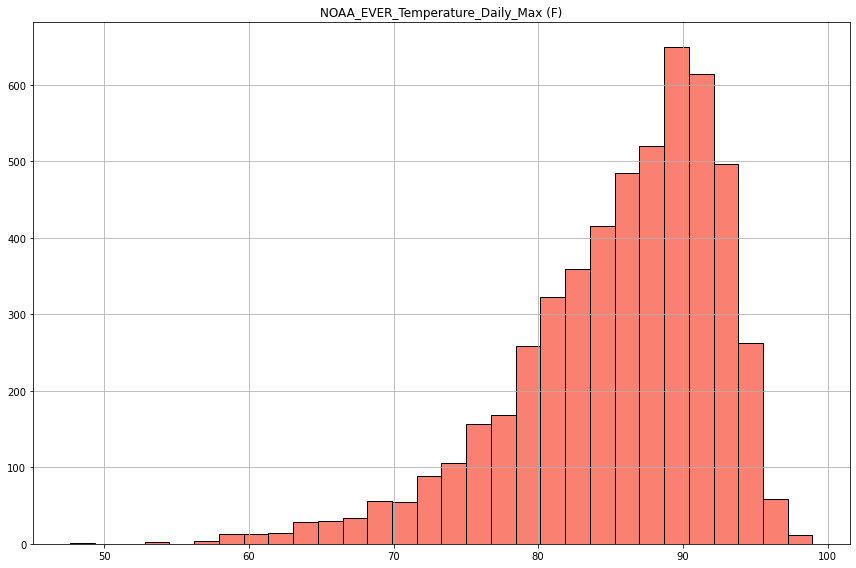

In [57]:
fig = df_FINAL.hist(
    'NOAA_EVER_Temperature_Daily_Max (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

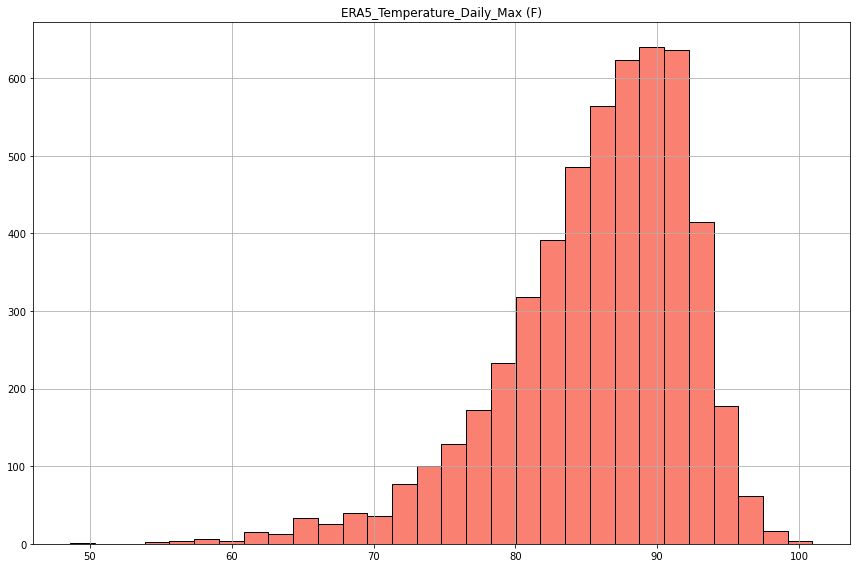

In [58]:
fig = df_FINAL.hist(
    'ERA5_Temperature_Daily_Max (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

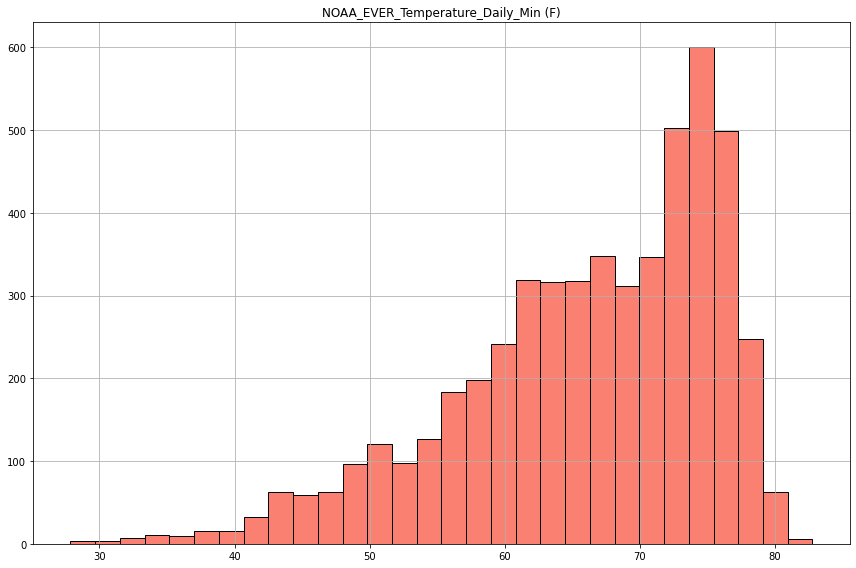

In [59]:
fig = df_FINAL.hist(
    'NOAA_EVER_Temperature_Daily_Min (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

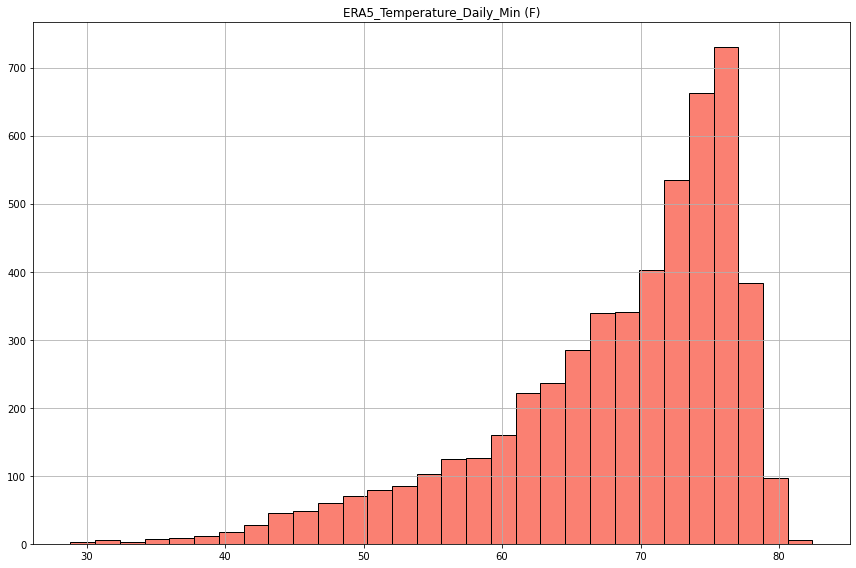

In [60]:
fig = df_FINAL.hist(
    'ERA5_Temperature_Daily_Min (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

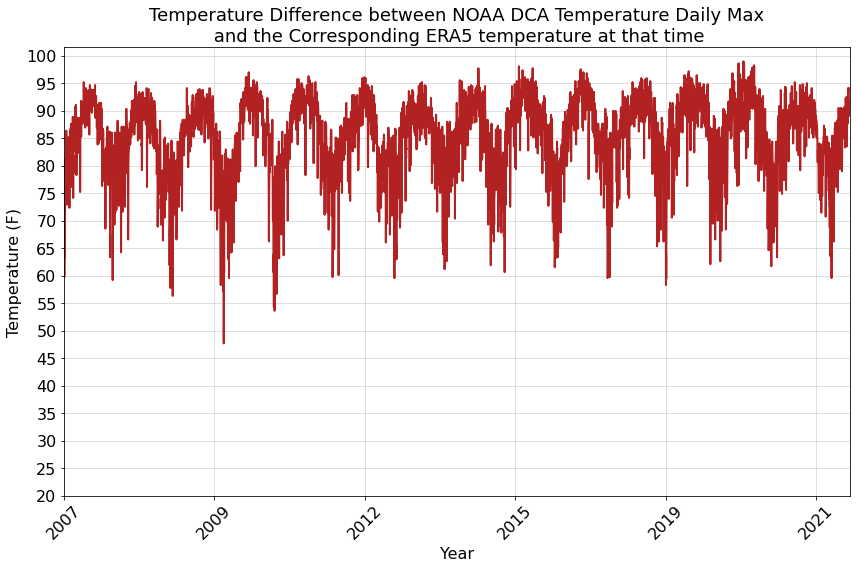

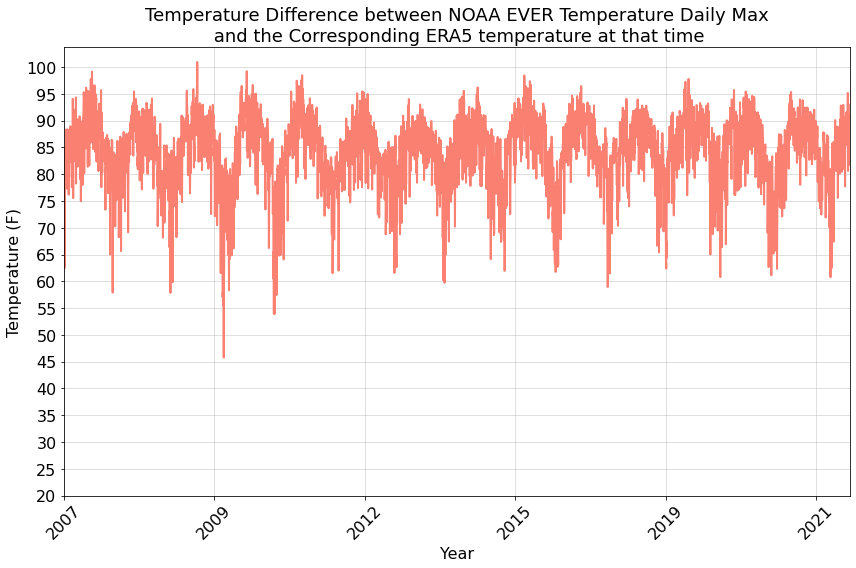

In [62]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA DCA Temperature Daily Max\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls0, = ax.plot(
    df_FINAL['NOAA_EVER_Temperature_Daily_Max (F)'].values, color='firebrick', lw=2.0)

ax.set_xticks(np.arange(
    0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Max (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(20,101,1)[::5])
ax.set_yticklabels(np.arange(20,101,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

# --

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA EVER Temperature Daily Max\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls1, = ax.plot(
    df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Max (F)'].values, color='salmon', lw=2.0)

ax.set_xticks(np.arange(
    0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Max (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(20,101,1)[::5])
ax.set_yticklabels(np.arange(20,101,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

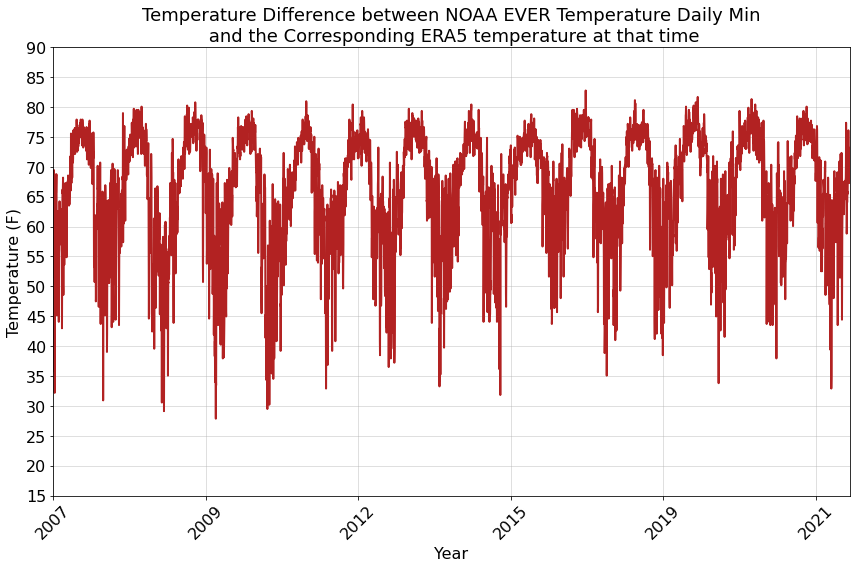

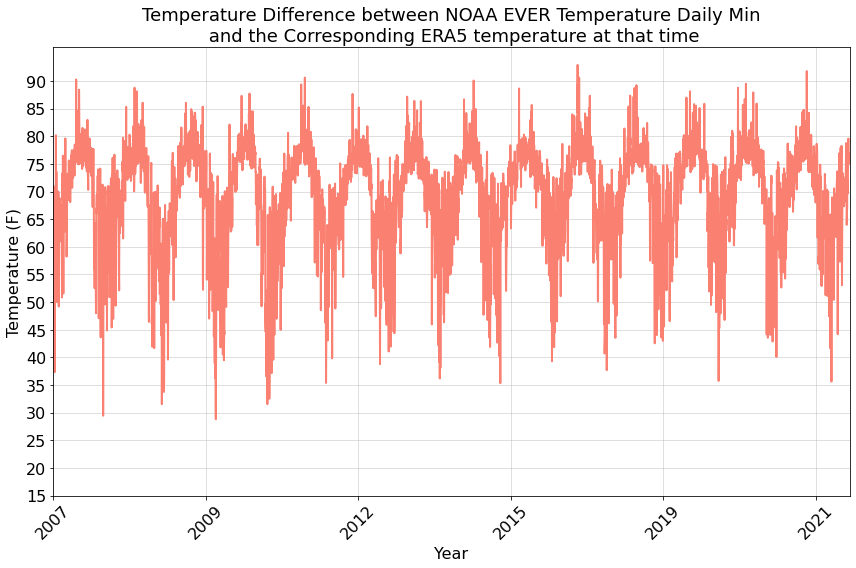

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA EVER Temperature Daily Min\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls0, = ax.plot(df_FINAL['NOAA_EVER_Temperature_Daily_Min (F)'].values, color='firebrick', lw=2.0)

ax.set_xticks(np.arange(0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Min (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(15,91,1)[::5])
ax.set_yticklabels(np.arange(15,91,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

# --

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA EVER Temperature Daily Min\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls1, = ax.plot(df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Min (F)'].values, color='salmon', lw=2.0)

ax.set_xticks(np.arange(0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_EVER_Daily_Min (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(15,91,1)[::5])
ax.set_yticklabels(np.arange(15,91,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

## save csv file

In [64]:
df_FINAL.to_csv(
    '/glade/scratch/molina/NOAA_EVER_ERA5_Temperature_2007-2022.csv')